In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [234]:
!pip install annoy



In [0]:
from annoy import AnnoyIndex

In [0]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [0]:
X_train=X_train/255
X_test = X_test/255

In [238]:
y_train.shape

(60000,)

In [0]:
 p=np.unique(y_train)

In [0]:
category_counts = dict(zip(*np.unique(y_train, return_counts=True)))

In [241]:
category_counts

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

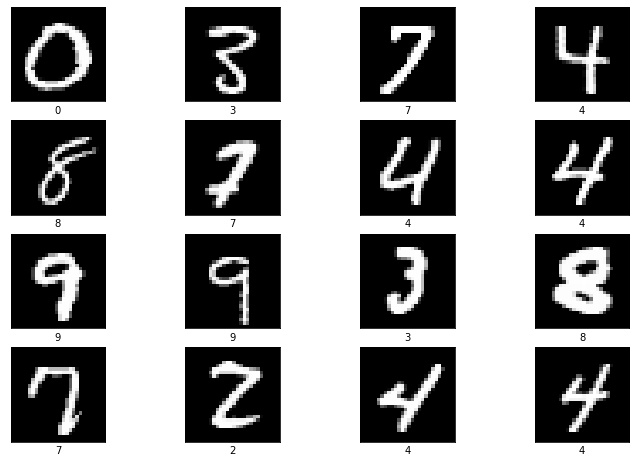

In [242]:
plt.figure(figsize=(12,8))
for index in range(16):
  rand_idx = np.random.randint(0,y_train.shape[0])
  plt.subplot(4,4,index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(X_train[rand_idx], cmap='Greys_r')
  plt.xlabel(p[y_train[rand_idx]])

In [0]:
def Encoder():
    input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format   
    e1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    e2 = MaxPooling2D((2, 2), padding='same')(e1)
    e3 = Conv2D(8, (3, 3), activation='relu', padding='same')(e2)
    e4 = MaxPooling2D((2, 2), padding='same')(e3)
    e5 = Conv2D(8, (3, 3), activation='relu', padding='same')(e4)
    e6 = MaxPooling2D((2, 2), padding='same')(e5)
    return Model(input_img, e6)


def Decoder():
    input_img = Input(shape=(4, 4, 8))  # adapt this if using `channels_first` image data format   
    d1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
    d2 = UpSampling2D((2, 2))(d1)
    d3 = Conv2D(8, (3, 3), activation='relu', padding='same')(d2)
    d4 = UpSampling2D((2, 2))(d3)
    d5 = Conv2D(16, (3, 3), activation='relu')(d4)
    d6 = UpSampling2D((2, 2))(d5)
    d7 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d6)
    return Model(input_img, d7)


# define input to the model:
x = Input(shape=(28, 28, 1))

# make the model:
autoencoder = Model(x, Decoder()(Encoder()(x)))

# compile the model:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [244]:
autoencoder.fit(X_train.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=5, 
          batch_size=200)

Epoch 1/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2241
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1706
Epoch 3/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1552
Epoch 4/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1463
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1400


In [0]:
encoder=Encoder()

In [246]:
encoder.summary()

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 8)           0  

In [0]:
decoder=Decoder()

In [248]:
decoder.summary()

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_37 (UpSampling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_38 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_39 (UpSampling (None, 28, 28, 16)        0  

In [0]:
encoded_imgs = encoder.predict(X_test.reshape(-1, 28, 28, 1))

In [0]:
a_ed_img=autoencoder.predict(X_test.reshape(-1, 28, 28, 1))

In [0]:
decoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [253]:
decoder.fit(encoded_imgs.reshape(-1, 4, 4, 8),          
          a_ed_img.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)

Epoch 1/10
10000/10000 [==============================] - 8s 808us/step - loss: 0.4473
Epoch 2/10
10000/10000 [==============================] - 8s 792us/step - loss: 0.2471
Epoch 3/10
10000/10000 [==============================] - 8s 793us/step - loss: 0.2219
Epoch 4/10
10000/10000 [==============================] - 8s 793us/step - loss: 0.2147
Epoch 5/10
10000/10000 [==============================] - 8s 793us/step - loss: 0.2104
Epoch 6/10
10000/10000 [==============================] - 8s 790us/step - loss: 0.2072
Epoch 7/10
10000/10000 [==============================] - 8s 793us/step - loss: 0.2043
Epoch 8/10
10000/10000 [==============================] - 8s 791us/step - loss: 0.2014
Epoch 9/10
10000/10000 [==============================] - 8s 785us/step - loss: 0.1983
Epoch 10/10
10000/10000 [==============================] - 8s 795us/step - loss: 0.1952


In [0]:
decoder_imgs=decoder.predict(encoded_imgs.reshape(-1,4,4,8))

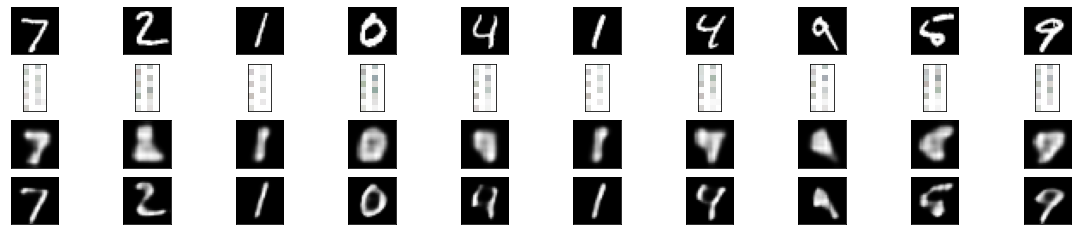

In [255]:
plt.figure(figsize=(40, 4))
for i in range(10):
  ax = plt.subplot(4, 20, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)



  ax = plt.subplot(4, 20, i + 1+20)
  plt.imshow(encoded_imgs[i].reshape(-1,4,4))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(4, 20, 2*20+i + 1 )
  plt.imshow(decoder_imgs[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(4, 20, 3*20 +i+ 1)
  plt.imshow(a_ed_img[i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

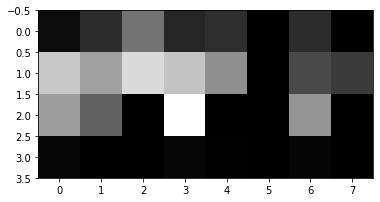

In [256]:
for i in encoded_imgs[0]:
  plt.imshow(i)

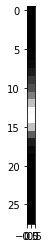

In [260]:
for i in decoder_imgs[0]:
  plt.imshow(i)

In [0]:
decoder.save_weights("decoder.h5")

In [0]:
autoencoder.save_weights("autoencoder.h5")

In [0]:
encoder.save_weights("encoder.h5")

<HDF5 dataset "decod_image": shape (10000, 28, 28, 1), type "<f4">

In [0]:

h5f = h5py.File('decoder_feature.h5', 'w')
h5f.create_dataset('decod_image',data=decoder_imgs)
h5f.close()

In [0]:
h5f = h5py.File('encoder_feature.h5', 'w')
h5f.create_dataset('encoder',data=encoded_imgs)
h5f.close()

In [0]:
y.max()

In [0]:
y.min()

In [0]:
for i in y[2]:
  plt.imshow(i)
  


In [0]:
plt.imshow(X_test[2])

In [0]:
y[2].shape

In [0]:
for i in y[1]:
  plt.imshow(i)

In [0]:
plt.imshow(X_test[1])

In [0]:
for i in y[0]:
  plt.imshow(i)

In [0]:
plt.imshow(X_test[0])